In [1]:
import numpy as np
import seaborn as sns

import ginsim
import biolqm
import maboss
from itertools import combinations # for iterating over sets
import matplotlib.pyplot as plt # for modifying plots
import pandas as pd # for the visualization of lists of states
import pydot

import os

from tools import load_trajs, draw_graph_from_pandas, compute_circuits, compute_stg_counts

In [2]:
path = "./boolean_network/"

In [3]:
bnd_file = path + "sizek.bnd"
cfg_file = path + "sizek_sustained.cfg"

masim = maboss.load(bnd_file, cfg_file)

/home/marco/anaconda3/envs/MaBoSS_env/lib/python3.9/site-packages/maboss/figures.py:86: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(plot_line, labels=plotting_labels, radius=1.2,


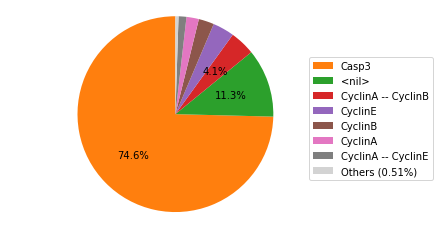

In [4]:
#Wild type

sim = masim.copy()

outputs = [ "Cdh1", "Cdc20"]

cyclins = ["CyclinA", "CyclinB", "CyclinE", "Casp3"]

sim.network.set_output(cyclins)

model = sim.run()

model.plot_piechart()

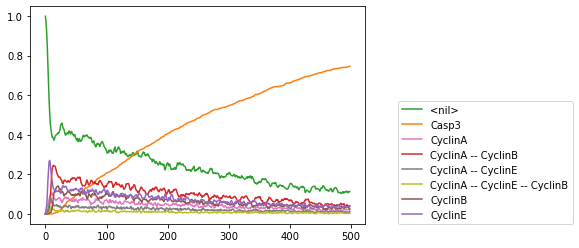

In [5]:
model.plot_trajectory()

In [6]:
## Discrete time
WT_phenotypes_discrete = sim.copy()
WT_phenotypes_discrete.update_parameters(discrete_time=1, time_tick=1, max_time=150)

In [7]:
%time res_discrete = WT_phenotypes_discrete.run()

CPU times: user 574 µs, sys: 4.83 ms, total: 5.41 ms
Wall time: 264 ms


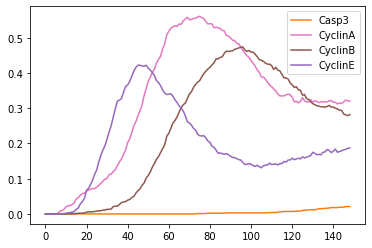

In [8]:
res_discrete.plot_node_trajectory()

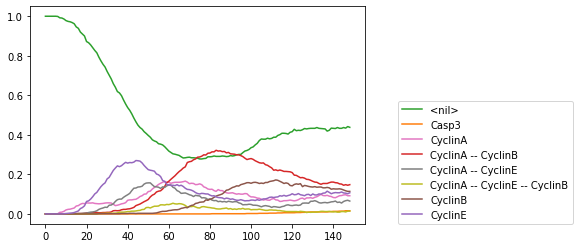

In [9]:
res_discrete.plot_trajectory()

# Analysis of the model for PhysiBoSS with phenotypes output

In [553]:
bnd_file = path + "sizek_phenotypes.bnd"
cfg_file = path + "sizek_sustained_phenotypes.cfg"

sim_phenotypes = maboss.load(bnd_file, cfg_file)

In [554]:
WT_phenotypes = sim_phenotypes.copy()

WT_result = WT_phenotypes.run()

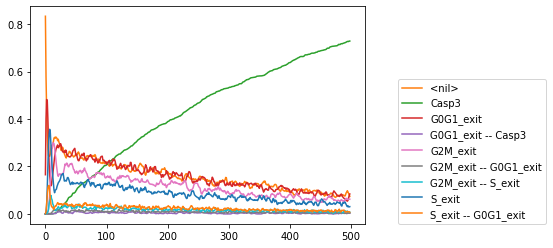

In [555]:
WT_result.plot_trajectory()

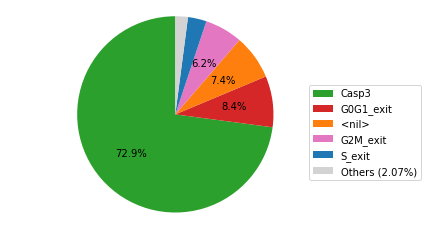

In [556]:
WT_result.plot_piechart()

CPU times: user 0 ns, sys: 7.18 ms, total: 7.18 ms
Wall time: 3.37 s


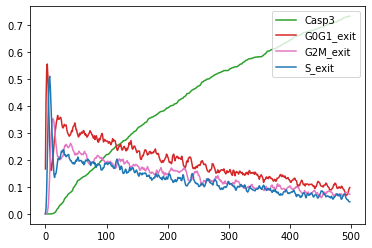

In [557]:
%time res = WT_phenotypes.run()
res.plot_node_trajectory()

In [558]:
## Discrete time
WT_phenotypes_discrete = WT_phenotypes.copy()
WT_phenotypes_discrete.update_parameters(discrete_time=1, time_tick=1, max_time=100)

cyclins = ["CyclinA", "CyclinB", "CyclinE", "CyclinD1"]

WT_phenotypes_discrete.network.set_output(cyclins)

In [559]:
%time res_discrete = WT_phenotypes_discrete.run()

CPU times: user 2.06 ms, sys: 4.63 ms, total: 6.69 ms
Wall time: 178 ms


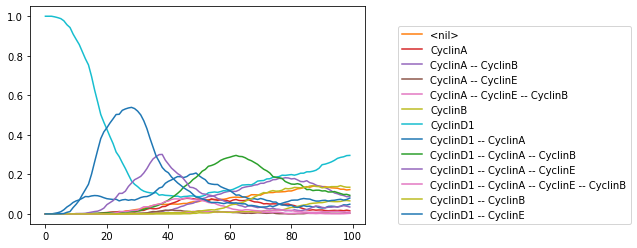

In [560]:
res_discrete.plot_trajectory()

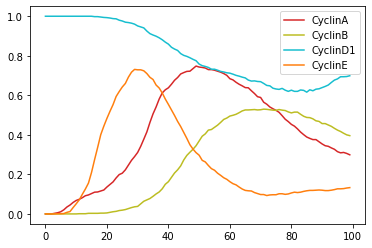

In [561]:
res_discrete.plot_node_trajectory()

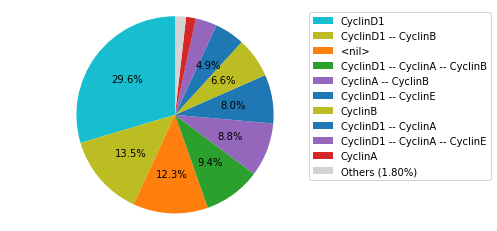

In [562]:
res_discrete.plot_piechart()

CPU times: user 2.31 ms, sys: 4.7 ms, total: 7.01 ms
Wall time: 198 ms


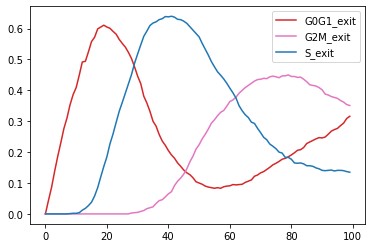

In [563]:
outputs_phenotype = ["G0G1_exit", "G2M_exit", "S_exit"]
WT_phenotypes_discrete.network.set_output(outputs_phenotype)

%time res_discrete = WT_phenotypes_discrete.run()
res_discrete.plot_node_trajectory()

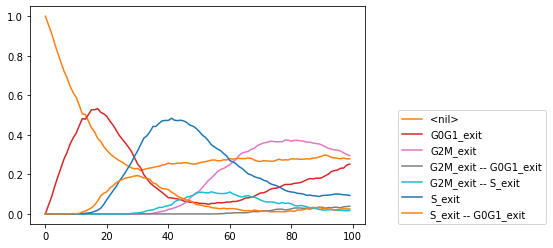

In [564]:
res_discrete.plot_trajectory()

In [565]:
WT_phenotypes_trajs = WT_phenotypes.copy()
WT_phenotypes_trajs.update_parameters(display_traj=1, thread_count=1)

In [566]:
%time res_trajs = WT_phenotypes_trajs.run()

CPU times: user 3.86 ms, sys: 49.2 ms, total: 53.1 ms
Wall time: 25.1 s


In [567]:
outputs = ["CyclinA", "CyclinB", "CyclinE", "CyclinD1"]
outputs_phenotype = ["G0G1_exit", "G2M_exit", "S_exit"]
trajs, all_states = load_trajs(res_trajs._path, outputs_phenotype, )
stg_counts, state_ids, ids_state = compute_stg_counts(trajs, all_states)

In [568]:
data = pd.DataFrame(
    data=stg_counts,
    index=state_ids.keys(), columns=state_ids.keys()
)
data

,<nil>,G0G1_exit,G0G1_exit -- G2M_exit,G0G1_exit -- S_exit,G2M_exit,G2M_exit -- S_exit,S_exit
<nil>,0.0,11260.0,0.0,0.0,0.0,0.0,0.0
G0G1_exit,3186.0,0.0,0.0,12453.0,0.0,0.0,0.0
G0G1_exit -- G2M_exit,0.0,4278.0,0.0,0.0,88.0,0.0,0.0
G0G1_exit -- S_exit,0.0,189.0,0.0,0.0,0.0,0.0,12252.0
G2M_exit,4275.0,0.0,4370.0,0.0,0.0,0.0,0.0
G2M_exit -- S_exit,0.0,0.0,0.0,0.0,8619.0,0.0,146.0
S_exit,3599.0,0.0,0.0,0.0,0.0,8771.0,0.0


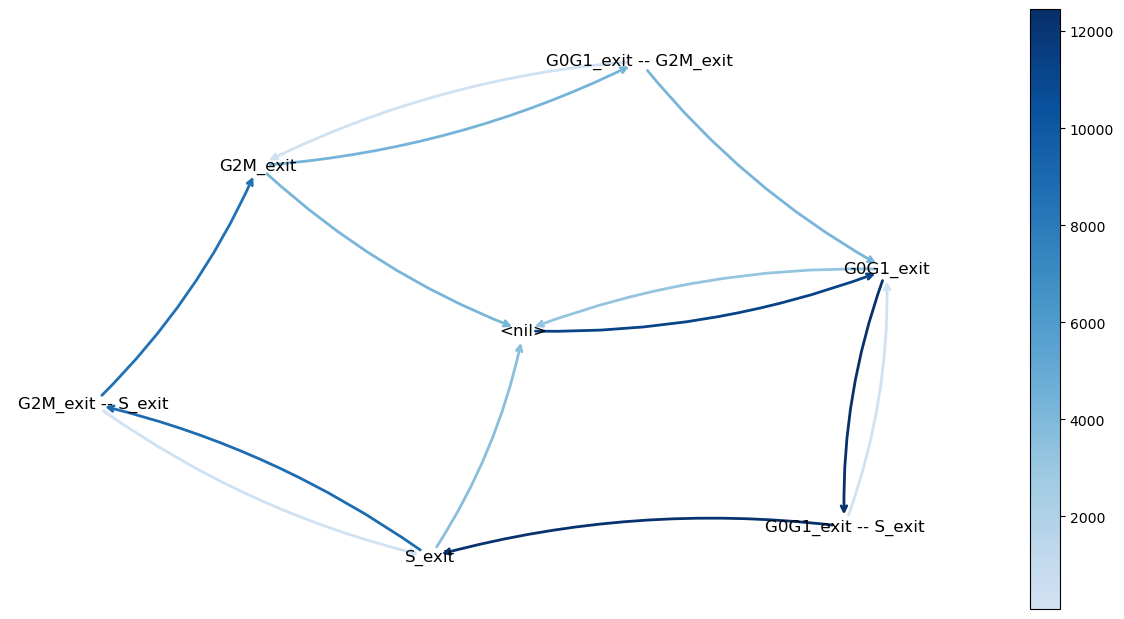

In [569]:
draw_graph_from_pandas(data)

In [570]:
probas = pd.DataFrame(
    data=np.divide(stg_counts,stg_counts.sum(axis=1)[:, np.newaxis]), 
    index=state_ids.keys(), columns=state_ids.keys()
)
probas

,<nil>,G0G1_exit,G0G1_exit -- G2M_exit,G0G1_exit -- S_exit,G2M_exit,G2M_exit -- S_exit,S_exit
<nil>,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
G0G1_exit,0.203721,0.000000,0.000000,0.796279,0.000000,0.000000,0.000000
G0G1_exit -- G2M_exit,0.000000,0.979844,0.000000,0.000000,0.020156,0.000000,0.000000
G0G1_exit -- S_exit,0.000000,0.015192,0.000000,0.000000,0.000000,0.000000,0.984808
G2M_exit,0.494505,0.000000,0.505495,0.000000,0.000000,0.000000,0.000000
G2M_exit -- S_exit,0.000000,0.000000,0.000000,0.000000,0.983343,0.000000,0.016657
S_exit,0.290946,0.000000,0.000000,0.000000,0.000000,0.709054,0.000000


In [571]:
%time paths_dict = compute_circuits(probas, ids_state, '<nil>', 0)

CPU times: user 2.88 ms, sys: 865 µs, total: 3.74 ms
Wall time: 1.26 ms


In [572]:
for proba in sorted(paths_dict, reverse=True):
    #if proba > 0.01:
    print("%.2f : %s" % (proba, paths_dict[proba]))

0.27 : ['<nil>', 'G0G1_exit', 'G0G1_exit -- S_exit', 'S_exit', 'G2M_exit -- S_exit', 'G2M_exit']
0.23 : ['<nil>', 'G0G1_exit', 'G0G1_exit -- S_exit', 'S_exit']
0.20 : ['<nil>', 'G0G1_exit']
